### Fashion MNIST dataset prediction via deep learning

In this notebook, we build a convoluation neural network using tensorflow to classify Fashion-MNIST dataset which is a dataset of Zalando's article images. Fashion-MNIST serves as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms

The training set consists of 60k examples and test set consists of 10k examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes as mentioned below.

0 T-shirt/top <br>
1 Trouser <br>
2 Pullover <br>
3 Dress <br>
4 Coat <br>
5 Sandal <br>
6 Shirt <br>
7 Sneaker <br>
8 Bag <br>
9 Ankle boot <br>

references: <br>
https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/

#### 1. import data

In [136]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import itertools

In [2]:
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

In [4]:
from keras.datasets import fashion_mnist

In [122]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#### 2. look at the first 9  pictures from the dataset

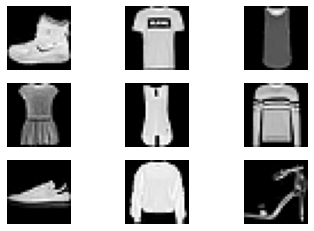

In [7]:
for i in np.arange(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')

#### 3. MLP model - simple neural network using keras

Build a simple neural network (a.k.a Multi-layer Perceptron) to classify MNIST digits dataset

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

In [9]:
# fix random seed for reproducibility

seed = 88
np.random.seed(seed)

In [10]:
# flatten 28*28 images to a 784 vector for each image
# basically make 2D into 1D

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [11]:
# normalize inputs from 0-255 to 0-1
# combine 28 x 28 pixels to 784 - give new shape
# testing 60000
# training 10000

X_train = X_train / 255
X_test = X_test / 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [12]:
# one hot encode outputs

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
num_classes = Y_test.shape[1] # y_test.shape = 10000,10

In [13]:
# build the model
# create model

model = Sequential()
model.add(Dense(num_pixels, input_shape=(num_pixels,), 
                 kernel_initializer='normal', activation='relu'))
model.add(Dense(num_classes, 
                 kernel_initializer='normal', activation='softmax'))

In [14]:
# compile model
# optimizer = sgd?

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# fit/train the model
# verbose = 1?
# epoch = 20?

model.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test), 
          epochs=15, 
          batch_size=200, 
          verbose=2)

Epoch 1/15
300/300 - 1s - loss: 0.5127 - accuracy: 0.8220 - val_loss: 0.4171 - val_accuracy: 0.8561
Epoch 2/15
300/300 - 1s - loss: 0.3773 - accuracy: 0.8658 - val_loss: 0.3930 - val_accuracy: 0.8620
Epoch 3/15
300/300 - 1s - loss: 0.3294 - accuracy: 0.8809 - val_loss: 0.3579 - val_accuracy: 0.8721
Epoch 4/15
300/300 - 1s - loss: 0.3035 - accuracy: 0.8895 - val_loss: 0.3462 - val_accuracy: 0.8749
Epoch 5/15
300/300 - 1s - loss: 0.2880 - accuracy: 0.8941 - val_loss: 0.3344 - val_accuracy: 0.8815
Epoch 6/15
300/300 - 1s - loss: 0.2713 - accuracy: 0.9003 - val_loss: 0.3357 - val_accuracy: 0.8799
Epoch 7/15
300/300 - 1s - loss: 0.2565 - accuracy: 0.9051 - val_loss: 0.3212 - val_accuracy: 0.8878
Epoch 8/15
300/300 - 1s - loss: 0.2422 - accuracy: 0.9114 - val_loss: 0.3351 - val_accuracy: 0.8788
Epoch 9/15
300/300 - 1s - loss: 0.2318 - accuracy: 0.9143 - val_loss: 0.3196 - val_accuracy: 0.8831
Epoch 10/15
300/300 - 1s - loss: 0.2202 - accuracy: 0.9187 - val_loss: 0.3367 - val_accuracy: 0.8811

In [16]:
# evaluation of the model
# verbose = 1?

scores1 = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', scores1[0]) # loss 
print('Test accuracy:', scores1[1]) # accuracy
print("Baseline Error: %.2f%%" % (100-scores1[1]*100))

Test score: 0.347295343875885
Test accuracy: 0.8808000087738037
Baseline Error: 11.92%


this means 8808 predicted correctly out of 10000 samples <br>
this means 1192 predicted incorrectly

In [17]:
print("\nModel Summary")
print(model.summary())


Model Summary
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None


inspect correct and incorrect predictions (4 each)

In [18]:
predicted_classes = np.argmax(model.predict(X_test), axis=-1)
correct_num = np.nonzero(predicted_classes == y_test)[0]
incorrect_num = np.nonzero(predicted_classes != y_test)[0]

In [19]:
correct_num

array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64)

In [20]:
len(correct_num)

8808

In [21]:
len(incorrect_num)

1192

In [56]:
numdictionary = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [58]:
numdictionary[predicted_classes[incorrect]]

'Shirt'

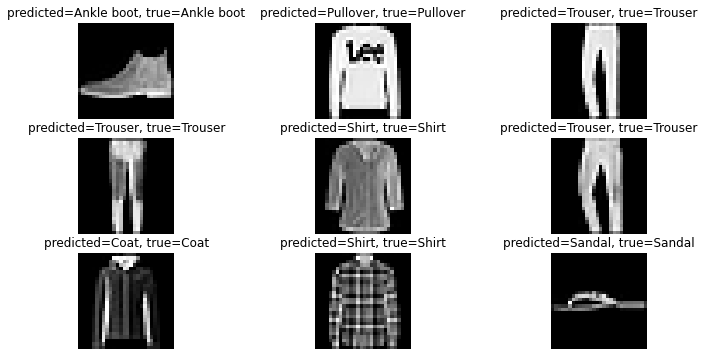

In [61]:
plt.figure(figsize=(12,6))
for i, correct in enumerate(correct_num[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("predicted={}, true={}".format(numdictionary[predicted_classes[correct]], 
                                             numdictionary[y_test[correct]]))
    plt.axis("off")

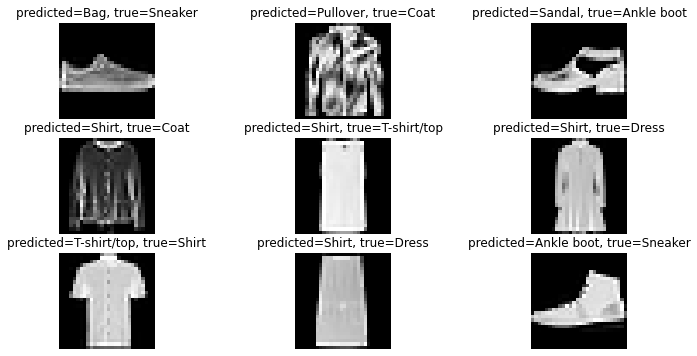

In [64]:
plt.figure(figsize=(12,6))
for i, incorrect in enumerate(incorrect_num[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("predicted={}, true={}".format(numdictionary[predicted_classes[incorrect]], 
                                             numdictionary[y_test[incorrect]]))
    plt.axis("off")

#### 4. Convolutional Neural Network (using the default image format)

In [65]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as K

In [67]:
# load data

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [68]:
# data preprocessing

if K.image_data_format() == 'channels_first':
    print("channels_first")
    # reshape to be [samples][pixels][rows][columns]
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
    inputShape = (1,28,28)
else:
    print('channels_last')
    # reshape to be [samples][rows][columns][pixels]
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    inputShape = (28,28,1)

channels_last


In [69]:
# normalize inputs from 0-255 to 0-1

X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [70]:
# build the model
# create model

model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=inputShape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (5, 5), input_shape=inputShape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [71]:
# Compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
# look at model summary first before fitting data

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [73]:
# Fit the model

model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs=10, 
          batch_size=32, 
          verbose=2)

Epoch 1/10
1875/1875 - 17s - loss: 0.5141 - accuracy: 0.8109 - val_loss: 0.3699 - val_accuracy: 0.8653
Epoch 2/10
1875/1875 - 17s - loss: 0.3446 - accuracy: 0.8745 - val_loss: 0.3172 - val_accuracy: 0.8836
Epoch 3/10
1875/1875 - 17s - loss: 0.3016 - accuracy: 0.8883 - val_loss: 0.2939 - val_accuracy: 0.8911
Epoch 4/10
1875/1875 - 16s - loss: 0.2723 - accuracy: 0.8984 - val_loss: 0.2894 - val_accuracy: 0.8913
Epoch 5/10
1875/1875 - 16s - loss: 0.2511 - accuracy: 0.9073 - val_loss: 0.2817 - val_accuracy: 0.8981
Epoch 6/10
1875/1875 - 18s - loss: 0.2359 - accuracy: 0.9117 - val_loss: 0.2628 - val_accuracy: 0.9034
Epoch 7/10
1875/1875 - 17s - loss: 0.2204 - accuracy: 0.9171 - val_loss: 0.2545 - val_accuracy: 0.9090
Epoch 8/10
1875/1875 - 16s - loss: 0.2104 - accuracy: 0.9208 - val_loss: 0.2570 - val_accuracy: 0.9078
Epoch 9/10
1875/1875 - 16s - loss: 0.1999 - accuracy: 0.9248 - val_loss: 0.2430 - val_accuracy: 0.9100
Epoch 10/10
1875/1875 - 16s - loss: 0.1878 - accuracy: 0.9290 - val_loss:

In [74]:
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', scores2[0]) # loss 
print('Test accuracy:', scores2[1]) # accuracy
print("CNN Error: %.2f%%" % (100-scores2[1]*100))

Test score: 0.25064486265182495
Test accuracy: 0.9110000133514404
CNN Error: 8.90%


In [75]:
print("\nModel Summary")
print(model.summary())


Model Summary
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128

#### 5. Recurrent Neural Network (LSTM)

In [76]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM

In [77]:
# load data

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [78]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [79]:
# construct model

model = Sequential()
model.add(LSTM(128, input_shape=(28, 28)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [80]:
# compile model

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [81]:
# look at model summary first

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               80384     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [82]:
# fit model 
model.fit(X_train, y_train, 
          batch_size=128, 
          epochs=10, 
          verbose=1, 
          validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 12s 26ms/step - loss: 0.7318 - accuracy: 0.7321 - val_loss: 0.5320 - val_accuracy: 0.8019
Epoch 2/10
469/469 [==============================] - 12s 25ms/step - loss: 0.5104 - accuracy: 0.8150 - val_loss: 0.4771 - val_accuracy: 0.8196
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 0.4463 - accuracy: 0.8386 - val_loss: 0.4588 - val_accuracy: 0.8312
Epoch 4/10
469/469 [==============================] - 12s 25ms/step - loss: 0.4093 - accuracy: 0.8507 - val_loss: 0.4314 - val_accuracy: 0.8440
Epoch 5/10
469/469 [==============================] - 12s 25ms/step - loss: 0.3866 - accuracy: 0.8576 - val_loss: 0.3868 - val_accuracy: 0.8606
Epoch 6/10
469/469 [==============================] - 12s 25ms/step - loss: 0.3675 - accuracy: 0.8665 - val_loss: 0.3717 - val_accuracy: 0.8672
Epoch 7/10
469/469 [==============================] - 12s 25ms/step - loss: 0.3510 - accuracy: 0.8716 - val_loss: 0.3544 - val_accuracy:

In [84]:
scores3 = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', scores3[0]) # loss 
print('Test accuracy:', scores3[1]) # accuracy
print("RNN Error: %.2f%%" % (100-scores3[1]*100))

Test score: 0.34890854358673096
Test accuracy: 0.8766999840736389
RNN Error: 12.33%


In [85]:
print("\nModel Summary")
print(model.summary())


Model Summary
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               80384     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________
None


#### 6. Evaluate best model

In [86]:
print('MLP model accuracy: {}'.format(round(scores1[1],4)))
print('CNN model accuracy: {}'.format(round(scores2[1],4)))
print('RNN model accuracy: {}'.format(round(scores3[1],4)))

MLP model accuracy: 0.8808
CNN model accuracy: 0.911
RNN model accuracy: 0.8767


#### 7. More complex model for best model - CNN

before using gridsearchcv or randomizedsearchcv to tune hyperparameters, will include ways to make the model better by including:

- padding
- batchnormalization
- additional convolution
- additional dropout
- additional dense 

padding = same, this preserve spatial dimensions of the volume where output vol size similar to input vol size

batch normalization speeds up process, keeps gradient smooth - so neural networks converge more smoothly, can be useful in preventing overfitting

the idea here is to get more trainable parameters <br>
probably more than a million

#### 7a. using rmsprop optimizer instead of adam

to see if adam or rmsprop optimizer would be a better choice <br>
not going to tune parameters for optimizer like learning rate, etc, since the libraries have been using default parameters recommended by papers

In [96]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
inputShape = (28,28,1)

X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [97]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=inputShape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (5, 5), input_shape=inputShape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs=10, 
          batch_size=32, 
          verbose=2)

Epoch 1/10
1875/1875 - 15s - loss: 0.5019 - accuracy: 0.8179 - val_loss: 0.3699 - val_accuracy: 0.8686
Epoch 2/10
1875/1875 - 15s - loss: 0.3393 - accuracy: 0.8766 - val_loss: 0.3288 - val_accuracy: 0.8815
Epoch 3/10
1875/1875 - 14s - loss: 0.2950 - accuracy: 0.8922 - val_loss: 0.2913 - val_accuracy: 0.8914
Epoch 4/10
1875/1875 - 14s - loss: 0.2708 - accuracy: 0.8987 - val_loss: 0.2702 - val_accuracy: 0.9004
Epoch 5/10
1875/1875 - 14s - loss: 0.2498 - accuracy: 0.9072 - val_loss: 0.2605 - val_accuracy: 0.9049
Epoch 6/10
1875/1875 - 14s - loss: 0.2332 - accuracy: 0.9123 - val_loss: 0.2672 - val_accuracy: 0.9025
Epoch 7/10
1875/1875 - 14s - loss: 0.2207 - accuracy: 0.9169 - val_loss: 0.2497 - val_accuracy: 0.9091
Epoch 8/10
1875/1875 - 14s - loss: 0.2101 - accuracy: 0.9201 - val_loss: 0.2469 - val_accuracy: 0.9105
Epoch 9/10
1875/1875 - 15s - loss: 0.2017 - accuracy: 0.9236 - val_loss: 0.2474 - val_accuracy: 0.9128
Epoch 10/10
1875/1875 - 15s - loss: 0.1920 - accuracy: 0.9280 - val_loss:

In [99]:
scores4 = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', scores4[0]) # loss 
print('Test accuracy:', scores4[1]) # accuracy
print("RMSProp CNN Error: %.2f%%" % (100-scores4[1]*100))

Test score: 0.2613404393196106
Test accuracy: 0.9071999788284302
RMSProp CNN Error: 9.28%


results slightly worse than earlier CNN model with 'adam' optimizer with 0.911% acuuracy

#### 7b. more complex model with CNN adam optimizer

In [95]:
from keras.layers.normalization import BatchNormalization
from keras.layers import ZeroPadding2D

In [124]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
inputShape = (28,28,1)

X_train = X_train / 255
X_test = X_test / 255

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
num_classes = Y_test.shape[1]

In [125]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=inputShape, activation='relu',
                 padding='same'))
model.add(Conv2D(32, (5, 5), input_shape=inputShape, activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), input_shape=inputShape, activation='relu',
                 padding='same'))
model.add(Conv2D(64, (3, 3), input_shape=inputShape, activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [126]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)         

In [127]:
model.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test), 
          epochs=10, 
          batch_size=32, 
          verbose=1)

Epoch 1/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.4230 - accuracy: 0.8464 - val_loss: 0.3346 - val_accuracy: 0.8768
Epoch 2/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.3024 - accuracy: 0.8888 - val_loss: 0.3291 - val_accuracy: 0.8794
Epoch 3/10
1875/1875 [==============================] - 121s 65ms/step - loss: 0.2629 - accuracy: 0.9023 - val_loss: 0.2420 - val_accuracy: 0.9132
Epoch 4/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.2394 - accuracy: 0.9109 - val_loss: 0.2645 - val_accuracy: 0.8999
Epoch 5/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.2178 - accuracy: 0.9188 - val_loss: 0.2518 - val_accuracy: 0.9088
Epoch 6/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.2067 - accuracy: 0.9231 - val_loss: 0.2182 - val_accuracy: 0.9216
Epoch 7/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.1925 - accuracy: 0.9290 - val_loss: 0

In [128]:
scores5 = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', scores5[0]) # loss 
print('Test accuracy:', scores5[1]) # accuracy
print("Complex CNN Error: %.2f%%" % (100-scores5[1]*100))

Test score: 0.22466713190078735
Test accuracy: 0.9246000051498413
Complex CNN Error: 7.54%


#### 7c. confusion matrix & classification report

plot confusion matrix

In [141]:
from sklearn.metrics import confusion_matrix, classification_report

In [129]:
predicted_classes = np.argmax(model.predict(X_test), axis=-1)
correct_num = np.nonzero(predicted_classes == y_test)[0]
incorrect_num = np.nonzero(predicted_classes != y_test)[0]

In [138]:
def plot_confusion_matrix(cm, class_, title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(class_))
    plt.xticks(tick_marks, class_, rotation=90)
    plt.yticks(tick_marks, class_)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()

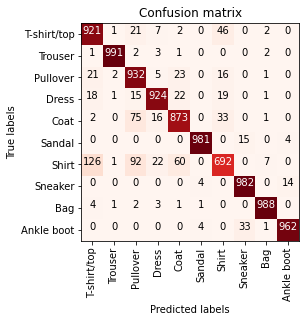

In [140]:
plot_confusion_matrix(confusion_matrix(y_test, predicted_classes), 
                      list(numdictionary.values()))

seems like shirt is easily misidentified, esp when it is shirt but predicted as t-shirt/top

taking a look at some incorrect predicted shirt images...

In [154]:
incorrect_shirt = []
for incorrect in incorrect_num:
    if predicted_classes[incorrect] == 6: # shirt is number 6
        incorrect_shirt.append(incorrect)

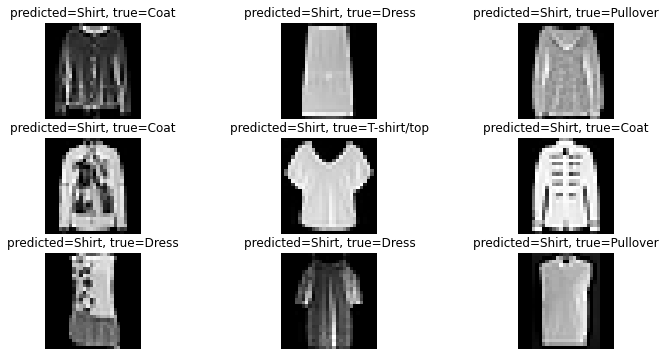

In [156]:
plt.figure(figsize=(12,6))
for i, incorrect in enumerate(incorrect_shirt[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("predicted={}, true={}".format(numdictionary[predicted_classes[incorrect]], 
                                             numdictionary[y_test[incorrect]]))
    plt.axis("off")

report of f1, precision and recall

In [142]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1000
           1       0.99      0.99      0.99      1000
           2       0.82      0.93      0.87      1000
           3       0.94      0.92      0.93      1000
           4       0.89      0.87      0.88      1000
           5       0.99      0.98      0.99      1000
           6       0.86      0.69      0.77      1000
           7       0.95      0.98      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



poor scores for shirt

#### 8. Conclusion

CNN should be the best model to use, improved model accuracy at ~0.924. <br>
we can also use RandomizedCV to search for hyperparameters tuning to improve score at a shorter time, but i wouldnt expect good improvement. <br>
some better ways to improve include augmentation and data preprocessing, where data augmentation of images can increase raw data via flipping, zooming, rotation or shearing, indirectly creating more unique images of the same image.